In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sklearn
import math

Looking at the Correlation between dependent variables and performing feature selection.
First, importing our clean dataset

In [2]:
clean= pd.read_pickle('CleanSet.pkl')

In [3]:
clean.head()

,Parcel,Price Hist,Street,SideWalks,Curb-Gutters,isCommercial,Year Built,Number of Bedrooms,Number of Bathrooms,Number of FirePlaces,...,PriceIn2017,PriceIn2016,PriceIn2015,PriceIn2014,PriceIn2013,PriceIn2012,PriceIn2011,PriceIn2010,PriceIn2009,PriceIn2008
0,R8394770330,"{'2019': '2,595,200', '2018': '2,521,100', '20...",Not,N,N,1,1950,1,2.25,5,...,"2,471,600","2,385,500","2,138,300","2,138,200","2,056,400","1,983,800","1,811,200","1,741,300","1,269,300","360,800"
1,R8394770010,"{'2019': '431,800', '2018': '377,300', '2017':...",Not,N,N,1,2014,2,2.5,1,...,"322,400","304,800","286,900","154,400","17,500","10,000","44,200","52,000","52,000","52,000"
2,R8394770030,"{'2019': '355,900', '2018': '309,800', '2017':...",Not,N,N,1,2014,2,2.0,0,...,"265,600","250,600","235,000","158,800","17,500","10,000","44,200","52,000","52,000","52,000"
3,R8394770050,"{'2019': '403,900', '2018': '352,800', '2017':...",Not,N,N,1,2014,3,2.5,1,...,"301,500","284,500","267,900","99,400","15,800","9,000","40,000","47,000","47,000","47,000"
4,R8394770070,"{'2019': '0', '2018': '0', '2017': '0', '2016'...",Not,N,N,1,1982,1,2.75,7,...,0,0,0,0,0,0,0,0,0,"5,000"


In [4]:
clean.columns

Index(['Parcel', 'Price Hist', 'Street', 'SideWalks', 'Curb-Gutters',
       'isCommercial', 'Year Built', 'Number of Bedrooms',
       'Number of Bathrooms', 'Number of FirePlaces', 'Car Storage Sq Ft #1',
       'Car Storage Sq Ft #2', 'General Purpose Building Sq Ft', 'Porch Sq Ft',
       'Deck Sq Ft', 'Patio Sq Ft', 'Pool Sq Ft', 'Total Sq Ft',
       'Main Floor Sq Ft', 'Upper Floor Sq Ft',
       'Unfinished Basement Floor Sq Ft', 'Finished Attic Sq Ft',
       'hasAirConditioning', 'hasCarStorage1', 'hasCarStorage2',
       'isDeckCovered', 'hasDeck', 'hasFinishedAttic', 'hasGroundFloor',
       'hasLeasableGround', 'hasBathroom', 'hasBedrooms', 'hasFireplace',
       'hasMoreFloors', 'hasMoreUnits', 'isPatioCovered', 'hasPatio',
       'hasPool', 'hasPorch', 'isRemodeled', 'hasSideWalk', 'isStreetFacing',
       'hasUpperFloor', 'Price', 'PriceIn2018', 'PriceIn2017', 'PriceIn2016',
       'PriceIn2015', 'PriceIn2014', 'PriceIn2013', 'PriceIn2012',
       'PriceIn2011', 'PriceI

In [5]:
numCols= ['Number of Bedrooms','Number of Bathrooms', 'Number of FirePlaces', 'Car Storage Sq Ft #1',
          'Car Storage Sq Ft #2', 'General Purpose Building Sq Ft', 'Porch Sq Ft',
          'Deck Sq Ft', 'Patio Sq Ft', 'Pool Sq Ft', 'Total Sq Ft','Main Floor Sq Ft',
          'Upper Floor Sq Ft','Unfinished Basement Floor Sq Ft', 'Finished Attic Sq Ft']

In [6]:
clean[numCols]= clean[numCols].astype(float)

In [7]:
prices= ['Price', 'PriceIn2018', 'PriceIn2017', 'PriceIn2016','PriceIn2015', 
          'PriceIn2014', 'PriceIn2013', 'PriceIn2012','PriceIn2011', 'PriceIn2010',
          'PriceIn2009', 'PriceIn2008']

In [8]:
clean[prices]= clean[prices].replace('\.','',regex=True).replace(',','',regex=True).astype(float)

In [9]:
clean[prices]= clean[prices].fillna(0)

One-hot encoding the categorical features.

In [10]:
categs= ['Street', 'SideWalks', 'Curb-Gutters','isCommercial',
         'Year Built','hasAirConditioning', 'hasCarStorage1', 'hasCarStorage2','isDeckCovered',
          'hasDeck', 'hasFinishedAttic', 'hasGroundFloor','hasLeasableGround', 'hasBathroom',
          'hasBedrooms', 'hasFireplace', 'hasMoreFloors', 'hasMoreUnits', 'isPatioCovered',
          'hasPatio', 'hasPool', 'hasPorch', 'isRemodeled', 'hasSideWalk', 'isStreetFacing',
          'hasUpperFloor']

In [11]:
for col in categs:
    hotCoded= pd.get_dummies(clean[col], prefix= col+'_',sparse= True)
    clean= clean.drop(col, axis=1)
    clean= pd.concat([clean, hotCoded], axis=1)

In [12]:
print(clean.columns)
print(clean.shape)

Index(['Parcel', 'Price Hist', 'Number of Bedrooms', 'Number of Bathrooms',
       'Number of FirePlaces', 'Car Storage Sq Ft #1', 'Car Storage Sq Ft #2',
       'General Purpose Building Sq Ft', 'Porch Sq Ft', 'Deck Sq Ft',
       ...
       'hasPorch__False', 'hasPorch__True', 'isRemodeled__False',
       'isRemodeled__True', 'hasSideWalk__False', 'hasSideWalk__True',
       'isStreetFacing__False', 'isStreetFacing__True', 'hasUpperFloor__False',
       'hasUpperFloor__True'],
      dtype='object', length=221)
(190451, 221)


In [13]:
cols= list(clean.columns.values)
cols.pop(cols.index('Price'))
clean= clean[cols+['Price']]

In [14]:
clean.head()

,Parcel,Price Hist,Number of Bedrooms,Number of Bathrooms,Number of FirePlaces,Car Storage Sq Ft #1,Car Storage Sq Ft #2,General Purpose Building Sq Ft,Porch Sq Ft,Deck Sq Ft,...,hasPorch__True,isRemodeled__False,isRemodeled__True,hasSideWalk__False,hasSideWalk__True,isStreetFacing__False,isStreetFacing__True,hasUpperFloor__False,hasUpperFloor__True,Price
0,R8394770330,"{'2019': '2,595,200', '2018': '2,521,100', '20...",1.0,2.25,5.0,821.0,700.0,110.0,483.0,89.0,...,0,0,1,1,0,0,1,1,0,2595200.0
1,R8394770010,"{'2019': '431,800', '2018': '377,300', '2017':...",2.0,2.50,1.0,487.0,0.0,0.0,131.0,0.0,...,1,1,0,1,0,0,1,0,1,431800.0
2,R8394770030,"{'2019': '355,900', '2018': '309,800', '2017':...",2.0,2.00,0.0,400.0,0.0,0.0,0.0,0.0,...,1,1,0,1,0,0,1,0,1,355900.0
3,R8394770050,"{'2019': '403,900', '2018': '352,800', '2017':...",3.0,2.50,1.0,489.0,0.0,0.0,59.0,30.0,...,1,1,0,1,0,0,1,0,1,403900.0
4,R8394770070,"{'2019': '0', '2018': '0', '2017': '0', '2016'...",1.0,2.75,7.0,2623.0,399.0,142.0,487.0,316.0,...,0,1,0,1,0,0,1,1,0,0.0


-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

In [15]:
final= clean[clean['Price'] != 0].drop('Price Hist', axis=1).reset_index().drop('index', axis=1).set_index('Parcel')

In [16]:
final.head()

,Number of Bedrooms,Number of Bathrooms,Number of FirePlaces,Car Storage Sq Ft #1,Car Storage Sq Ft #2,General Purpose Building Sq Ft,Porch Sq Ft,Deck Sq Ft,Patio Sq Ft,Pool Sq Ft,...,hasPorch__True,isRemodeled__False,isRemodeled__True,hasSideWalk__False,hasSideWalk__True,isStreetFacing__False,isStreetFacing__True,hasUpperFloor__False,hasUpperFloor__True,Price
Parcel,,,,,,,,,,,,,,,,,,,,,
R8394770330,1.0,2.25,5.0,821.0,700.0,110.0,483.0,89.0,1234.0,128.0,...,0,0,1,1,0,0,1,1,0,2595200.0
R8394770010,2.0,2.50,1.0,487.0,0.0,0.0,131.0,0.0,138.0,0.0,...,1,1,0,1,0,0,1,0,1,431800.0
R8394770030,2.0,2.00,0.0,400.0,0.0,0.0,0.0,0.0,230.0,0.0,...,1,1,0,1,0,0,1,0,1,355900.0
R8394770050,3.0,2.50,1.0,489.0,0.0,0.0,59.0,30.0,184.0,0.0,...,1,1,0,1,0,0,1,0,1,403900.0
R8394770090,3.0,2.50,1.0,418.0,0.0,0.0,0.0,0.0,259.0,0.0,...,1,1,0,1,0,0,1,0,1,403700.0


## Feature Selection

Importing necessary libraries for feature selection

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LassoCV

Getting x and y from our train dataset

In [18]:
final_x= final.iloc[:, 1:218]
final_x.head()

,Number of Bathrooms,Number of FirePlaces,Car Storage Sq Ft #1,Car Storage Sq Ft #2,General Purpose Building Sq Ft,Porch Sq Ft,Deck Sq Ft,Patio Sq Ft,Pool Sq Ft,Total Sq Ft,...,hasPorch__False,hasPorch__True,isRemodeled__False,isRemodeled__True,hasSideWalk__False,hasSideWalk__True,isStreetFacing__False,isStreetFacing__True,hasUpperFloor__False,hasUpperFloor__True
Parcel,,,,,,,,,,,,,,,,,,,,,
R8394770330,2.25,5.0,821.0,700.0,110.0,483.0,89.0,1234.0,128.0,2153.0,...,1,0,0,1,1,0,0,1,1,0
R8394770010,2.50,1.0,487.0,0.0,0.0,131.0,0.0,138.0,0.0,1879.0,...,0,1,1,0,1,0,0,1,0,1
R8394770030,2.00,0.0,400.0,0.0,0.0,0.0,0.0,230.0,0.0,1562.0,...,0,1,1,0,1,0,0,1,0,1
R8394770050,2.50,1.0,489.0,0.0,0.0,59.0,30.0,184.0,0.0,1686.0,...,0,1,1,0,1,0,0,1,0,1
R8394770090,2.50,1.0,418.0,0.0,0.0,0.0,0.0,259.0,0.0,1656.0,...,0,1,1,0,1,0,0,1,0,1


In [19]:
final_y= final.iloc[:,-1]
final_y.head()

Parcel
R8394770330    2595200.0
R8394770010     431800.0
R8394770030     355900.0
R8394770050     403900.0
R8394770090     403700.0
Name: Price, dtype: float64

### Looking at the best features using **SelectKBest** and **f_regression** function

In [20]:
kBest= SelectKBest(score_func=f_regression, k=50)
kBestModel= kBest.fit(final_x, final_y)
modelScores= pd.DataFrame(kBestModel.scores_)
modelCols= pd.DataFrame(final_x.columns)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Rohit\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Rohit\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Rohit\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [21]:
scores= pd.concat([modelCols, modelScores], axis=1)
scores.columns= ['Feature','Score']
scores= scores.set_index('Feature')
scores.nlargest(60,'Score')

,Score
Feature,
PriceIn2018,548809.644320
PriceIn2017,400511.593977
PriceIn2016,266940.778804
PriceIn2015,231097.251662
PriceIn2014,202850.678870
PriceIn2013,165343.399800
PriceIn2011,130161.273595
PriceIn2012,127374.813768
PriceIn2010,114137.811867


### Looking at the best features using **LassoCV**

In [22]:
lasso= LassoCV(fit_intercept= True,
              normalize= True,
              cv= 5,
              random_state=101)

In [23]:
lasso.fit(final_x,final_y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=101,
    selection='cyclic', tol=0.0001, verbose=False)

LassoCV Statistics

In [24]:
print('Best Alpha Scored:', lasso.alpha_)

Best Alpha Scored: 16.571826122515922


In [25]:
model_coef= pd.Series(lasso.coef_, index= list(final_x.columns[:]))
print('Variables eliminated:', str(sum(model_coef == 0)))

Variables eliminated: 201


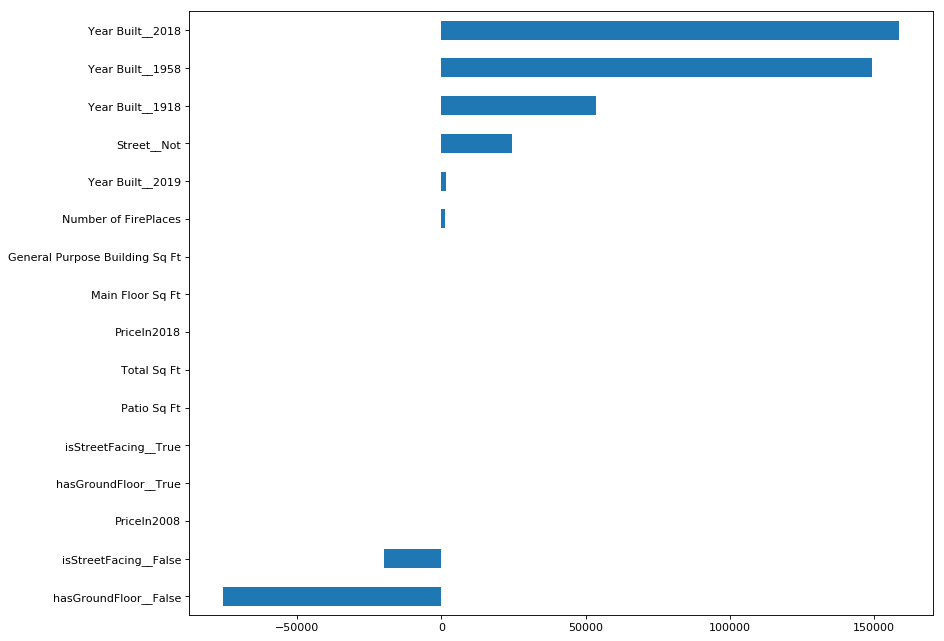

In [26]:
figure(num=None, figsize=(12,10), dpi=80, facecolor= 'w', edgecolor='w')
top= model_coef.sort_values()
top[top !=0].plot(kind= 'barh')

**LassoCV** has severly criticized our data by *eliminating 201 out of 219 features.*
We will be going with the results of the **selectKBest** model with *k= 60*

In [27]:
bestScore= scores.nlargest(60,'Score')
bestCols= list(bestScore.index)
print(bestCols)

['PriceIn2018', 'PriceIn2017', 'PriceIn2016', 'PriceIn2015', 'PriceIn2014', 'PriceIn2013', 'PriceIn2011', 'PriceIn2012', 'PriceIn2010', 'PriceIn2009', 'PriceIn2008', 'hasGroundFloor__True', 'hasLeasableGround__True', 'hasMoreUnits__True', 'isRemodeled__True', 'hasGroundFloor__False', 'hasLeasableGround__False', 'hasMoreUnits__False', 'isRemodeled__False', 'Total Sq Ft', 'hasBathroom__False', 'hasBathroom__True', 'hasDeck__False', 'hasDeck__True', 'hasBedrooms__False', 'hasBedrooms__True', 'hasAirConditioning__False', 'hasAirConditioning__True', 'hasCarStorage1__False', 'hasCarStorage2__False', 'isDeckCovered__False', 'hasFinishedAttic__False', 'hasFireplace__False', 'isPatioCovered__False', 'hasPatio__False', 'hasPool__False', 'hasPorch__False', 'hasUpperFloor__False', 'hasCarStorage1__True', 'hasCarStorage2__True', 'isDeckCovered__True', 'hasFinishedAttic__True', 'hasFireplace__True', 'isPatioCovered__True', 'hasPatio__True', 'hasPool__True', 'hasPorch__True', 'hasUpperFloor__True', '

### Filtering the dataframe with the selected features

In [28]:
bestCols.append('Price')
final= final[bestCols]

In [29]:
final.head()

,PriceIn2018,PriceIn2017,PriceIn2016,PriceIn2015,PriceIn2014,PriceIn2013,PriceIn2011,PriceIn2012,PriceIn2010,PriceIn2009,...,Car Storage Sq Ft #1,Deck Sq Ft,Pool Sq Ft,Upper Floor Sq Ft,Finished Attic Sq Ft,Unfinished Basement Floor Sq Ft,Patio Sq Ft,Car Storage Sq Ft #2,Porch Sq Ft,Price
Parcel,,,,,,,,,,,,,,,,,,,,,
R8394770330,2521100.0,2471600.0,2385500.0,2138300.0,2138200.0,2056400.0,1811200.0,1983800.0,1741300.0,1269300.0,...,821.0,89.0,128.0,702.0,437.0,1144.0,1234.0,700.0,483.0,2595200.0
R8394770010,377300.0,322400.0,304800.0,286900.0,154400.0,17500.0,44200.0,10000.0,52000.0,52000.0,...,487.0,0.0,0.0,435.0,0.0,0.0,138.0,0.0,131.0,431800.0
R8394770030,309800.0,265600.0,250600.0,235000.0,158800.0,17500.0,44200.0,10000.0,52000.0,52000.0,...,400.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,0.0,355900.0
R8394770050,352800.0,301500.0,284500.0,267900.0,99400.0,15800.0,40000.0,9000.0,47000.0,47000.0,...,489.0,30.0,0.0,577.0,0.0,0.0,184.0,0.0,59.0,403900.0
R8394770090,352600.0,301400.0,284400.0,267700.0,59400.0,15800.0,40000.0,9000.0,47000.0,47000.0,...,418.0,0.0,0.0,392.0,0.0,0.0,259.0,0.0,0.0,403700.0


### Writing dataset to file

In [30]:
final.to_pickle('final.pkl')